In [21]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
# tensorflow input pipeline

In [10]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "F:\\Projects\\FYP\\NewDataset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 22930 files belonging to 10 classes.


In [13]:
class_names = dataset.class_names


In [11]:
len(dataset)

717

In [12]:
717*32

22944

In [15]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(image_batch[0])

(32, 256, 256, 3)
tf.Tensor(
[[[137. 141. 140.]
  [142. 146. 145.]
  [145. 149. 148.]
  ...
  [159. 159. 159.]
  [159. 159. 159.]
  [163. 163. 163.]]

 [[134. 138. 137.]
  [136. 140. 139.]
  [140. 144. 143.]
  ...
  [158. 158. 158.]
  [157. 157. 157.]
  [160. 160. 160.]]

 [[142. 146. 145.]
  [137. 141. 140.]
  [138. 142. 141.]
  ...
  [157. 157. 157.]
  [155. 155. 155.]
  [158. 158. 158.]]

 ...

 [[ 80.  80.  80.]
  [ 79.  79.  79.]
  [ 78.  78.  78.]
  ...
  [ 76.  76.  78.]
  [ 75.  75.  77.]
  [ 75.  75.  77.]]

 [[ 81.  81.  81.]
  [ 80.  80.  80.]
  [ 79.  79.  79.]
  ...
  [ 78.  78.  80.]
  [ 79.  79.  81.]
  [ 79.  79.  81.]]

 [[ 82.  82.  82.]
  [ 81.  81.  81.]
  [ 80.  80.  80.]
  ...
  [ 80.  80.  82.]
  [ 82.  82.  84.]
  [ 83.  83.  85.]]], shape=(256, 256, 3), dtype=float32)


In [13]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[170. 160. 168.]
  [146. 136. 144.]
  [156. 146. 154.]
  ...
  [150. 139. 147.]
  [144. 133. 141.]
  [158. 147. 155.]]

 [[159. 149. 157.]
  [146. 136. 144.]
  [160. 150. 158.]
  ...
  [114. 103. 111.]
  [120. 109. 117.]
  [115. 104. 112.]]

 [[162. 152. 160.]
  [156. 146. 154.]
  [172. 162. 170.]
  ...
  [144. 133. 141.]
  [128. 117. 125.]
  [147. 136. 144.]]

 ...

 [[186. 179. 186.]
  [195. 188. 195.]
  [184. 177. 184.]
  ...
  [127. 116. 122.]
  [197. 186. 192.]
  [100.  89.  95.]]

 [[159. 152. 159.]
  [167. 160. 167.]
  [175. 168. 175.]
  ...
  [143. 132. 138.]
  [102.  91.  97.]
  [140. 129. 135.]]

 [[164. 157. 164.]
  [168. 161. 168.]
  [185. 178. 185.]
  ...
  [165. 154. 160.]
  [145. 134. 140.]
  [124. 113. 119.]]]


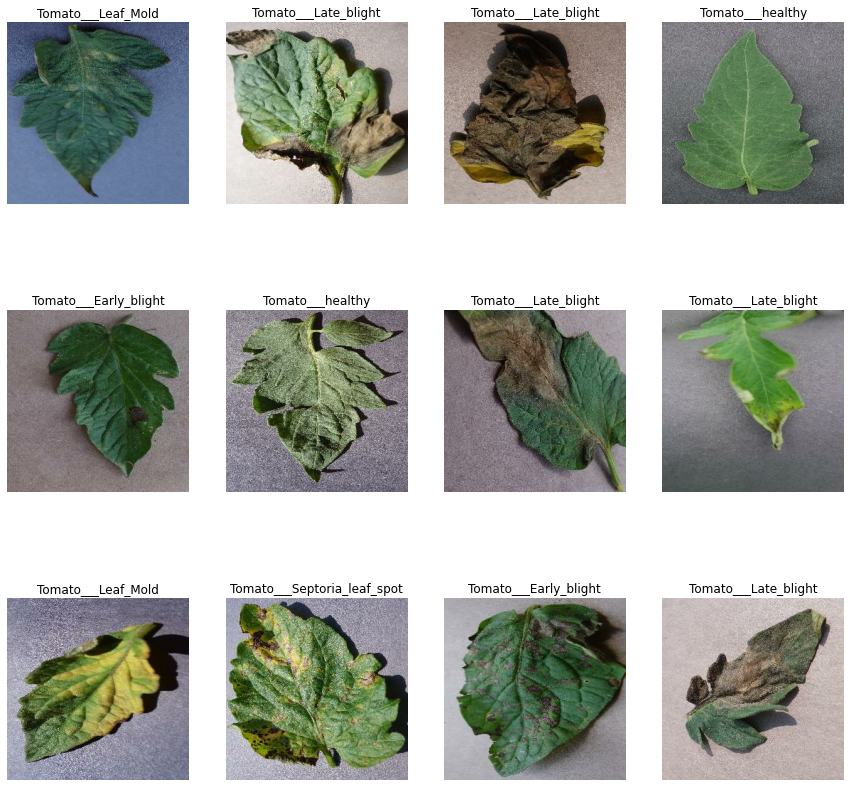

In [22]:
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [14]:
len(dataset)

717

In [15]:
80% = Training
20% = 10-10 val & test

SyntaxError: invalid syntax (<ipython-input-15-2d42245bda78>, line 1)

In [14]:
train_size = 0.8
len(dataset)*train_size

573.6

In [15]:
train_ds = dataset.take(574)
len(train_ds)

574

In [16]:
test_ds = dataset.skip(574)
len(dataset)

717

In [17]:
val_size = 0.1
len(dataset)*val_size

71.7

In [18]:
val_ds = test_ds.take(72)
len(val_ds)

72

In [19]:
test_ds = test_ds.skip(72)
len(test_ds)

71

In [54]:
print("Training set: " + str(len(train_ds)))
print("Validation set: " + str(len(val_ds)))
print("Test set: " + str(len(test_ds)))

Training set: 574
Validation set: 72
Test set: 71


In [55]:
# prefetch & cache
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [56]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [57]:
# data augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [58]:
# cnn ; feature extraction
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [59]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [60]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [61]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
574/574 [==============================] - 955s 2s/step - loss: 1.8565 - accuracy: 0.3553 - val_loss: 1.3240 - val_accuracy: 0.5616
Epoch 2/50
574/574 [==============================] - 942s 2s/step - loss: 0.9452 - accuracy: 0.6724 - val_loss: 0.8293 - val_accuracy: 0.7114
Epoch 3/50
574/574 [==============================] - 1019s 2s/step - loss: 0.6549 - accuracy: 0.7719 - val_loss: 1.2019 - val_accuracy: 0.6623
Epoch 4/50
574/574 [==============================] - 1039s 2s/step - loss: 0.5264 - accuracy: 0.8175 - val_loss: 0.6795 - val_accuracy: 0.7795
Epoch 5/50
574/574 [==============================] - 1036s 2s/step - loss: 0.4370 - accuracy: 0.8493 - val_loss: 0.6080 - val_accuracy: 0.7960
Epoch 6/50
574/574 [==============================] - 1038s 2s/step - loss: 0.3873 - accuracy: 0.8667 - val_loss: 0.4735 - val_accuracy: 0.8446
Epoch 7/50
574/574 [==============================] - 1035s 2s/step - loss: 0.3376 - accuracy: 0.8866 - val_loss: 0.5890 - val_accuracy: 0

In [62]:
scores = model.evaluate(test_ds)

71/71 [==============================] - 50s 553ms/step - loss: 0.1205 - accuracy: 0.9615


In [63]:
scores

[0.12046199291944504, 0.9614703059196472]

In [64]:
history

In [65]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 574}

In [66]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [67]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

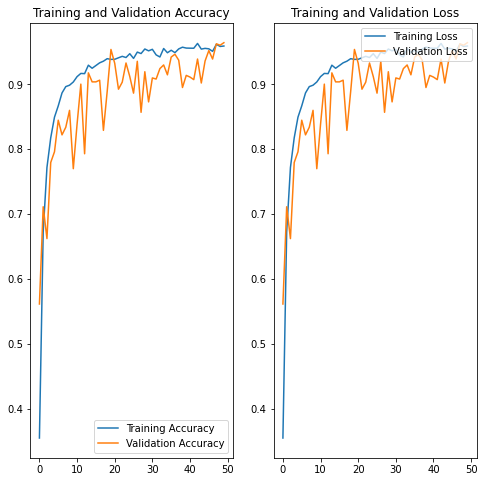

In [68]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), acc, label='Training Loss')
plt.plot(range(EPOCHS), val_acc, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

actual label:  Tomato___Tomato_mosaic_virus
predicted label:  Tomato___Tomato_mosaic_virus


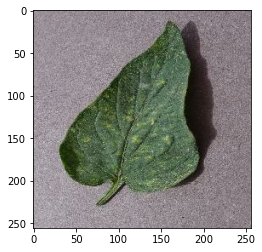

In [69]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    plt.imshow(first_image)
    print('actual label: ', class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print('predicted label: ', class_names[np.argmax(batch_prediction[0])])

In [70]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

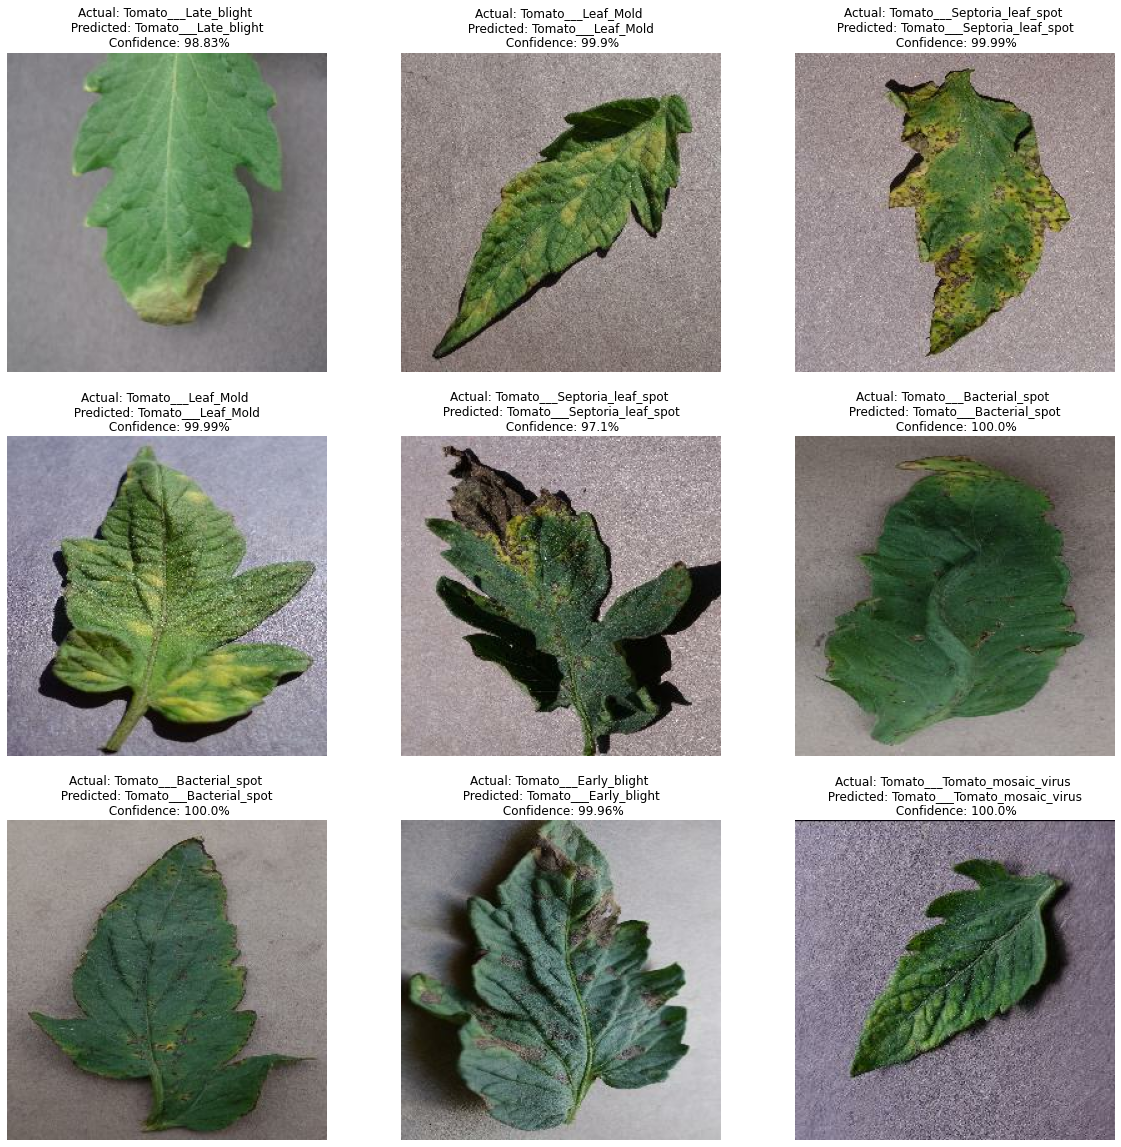

In [71]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}%")
        
        plt.axis('off')

In [72]:
model_version = 2
model.save(f"D:\Tejas\DisDet\Model{model_version}")

INFO:tensorflow:Assets written to: D:\Tejas\DisDet\Model2\assets


In [4]:
new_model = tf.keras.models.load_model(f'F:\Projects\FYP\Model2')

In [5]:
new_model.summarymary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [6]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # create a batch
    
    predictions = new_model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 40ms/step


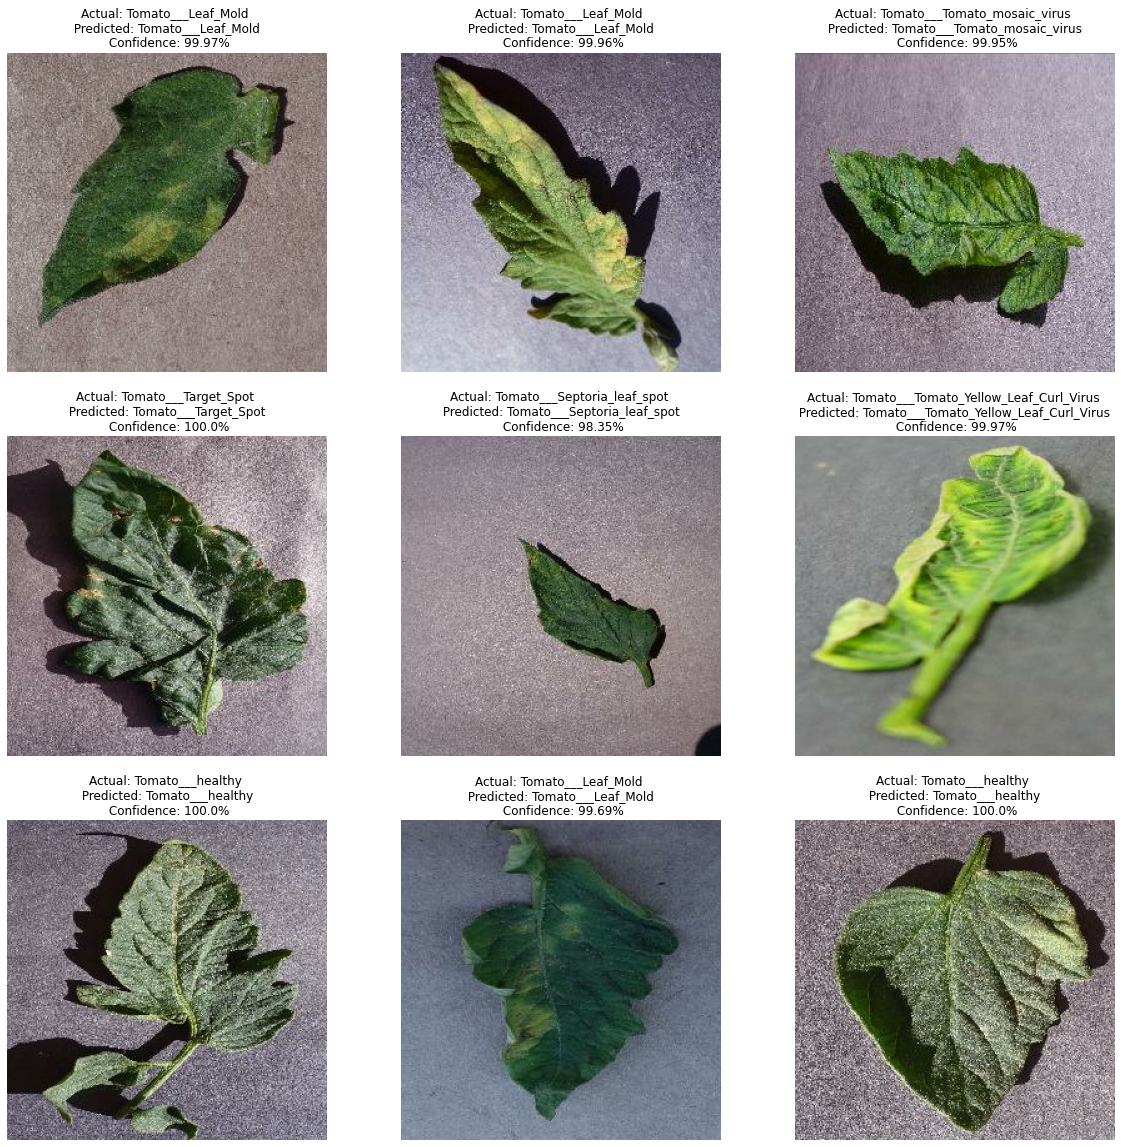

In [22]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(new_model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class} \n Predicted: {predicted_class} \n Confidence: {confidence}%")
        
        plt.axis('off')